# **Recognition of Russian handwritten text**

## Training data

Two datasets were used for training:

Russian-language database:

- Handwritten Kazakh and Russian (HKR) database for text recognition (https://github.com/abdoelsayed2016/HKR_Dataset)
- Non-commercial licence

  Advantages:
  - Contains approximately 63,000 images of sentences (consisting of words and phrases) written in around 200 different handwritings.
- Probably the only dataset for Russian handwritten text recognition.

Disadvantages:
  - There are only about 2,800 unique sentences. Only these were used for training, to avoid retraining the model for individual phrases. It was assumed that, even with this dataset, the model would learn to recognise different spellings of the same characters.
  - The 'sentences' are too short, usually consisting of one or two words, which does not allow the model to learn to recognise longer sequences.
- Poor markup in places

English-language database:

IAM Handwriting Database (https://fki.tic.heia-fr.ch/databases/iam-handwriting-database) Non-commercial licence

Advantages:
- 13,400 images of segmented and cleaned sentences. - About 650 different handwritings.
  - Long sentences. - Many unique ones.

Disadvantages:
- Inconvenient markup: all tokens are separated (for example, commas are separated by spaces on both sides), which does not correspond to real-life writing. There are errors in some places.

## Model parameters and architecture

The architecture of the baseline model resembles the architecture from the article [Convolve, Attend and Spell](http://www.cvc.uab.es/~marcal/pdfs/GCPR18.pdf) with a number of changes. Instead of VGG, ResNet was used, and instead of GRU, LSTM was used, but for decoding, [LSTM with an attention mechanism](https://openspeech-team. github.io/openspeech/modules/Decoders.html#module-openspeech.decoders.lstm_attention_decoder), implemented in the [openspeech](https://github.com/openspeech-team/openspeech) library.

Unfortunately, due to Google Colab's limitations on GPU usage time, we were unable to try advanced architectures such as Conformer, Transformer-Transducer, etc., implemented in the openspeech library.

> Features of the ***openspeech*** library

***Advantages***:
  - A large number of ready-made architectures for ASR (Automatic Speech Recognition), which are also suitable for handwritten text recognition tasks

***Disadvantages***:
  - The library does not install correctly via pip
  - After compiling the library from github, errors occur when using modules.

## Training parameters

> For augmentation, we used the [albumentations](https://github.com/albumentations-team/albumentations) library and applied the following:

- Gaussian noise
- Blur
- Shift, scale, rotate
- Optical distortions
- CLAHE, brightness/contrast and hue adjustment
- Cutout - cutting out random areas from the image

> Model trained with the Adam optimiser for 10 epochs with lr = 0.0001. Teacher forcing was used to train the decoder.

Handwritten text recognition is an open problem in science. Due to the lack of open datasets for the Russian language, model training and its final performance may be low.

During the experiment, various model architectures and their performance will be examined, and the best one will be selected. To improve the model's final metrics, it will be necessary to train it jointly in Russian and English, as well as to use augmentations for regularisation and expansion of the training sample.

The experiment should result in reproducible code for training and validating the model. Obtaining metrics comparable to those mentioned in the scientific literature will mean the experiment was a success.

### 1. Data

The following open sources will be used as data for training models:

- Russian-language resources:
- [Cyrillic Handwriting Dataset](https://www.kaggle.com/constantinwerner/cyrillic-handwriting-dataset) **[CC0]**
  - [Handwritten Kazakh and Russian (HKR) database for text recognition](https://github.com/abdoelsayed2016/HKR_Dataset) **[Non-commercial]**

- English-language resources:
  - [IAM Handwriting Database](https://fki.tic.heia-fr.ch/databases/iam-handwriting-database) **[Non-commercial. AVAILABLE]**
  - [The RIMES database](http://www.a2ialab.com/doku.php?id=rimes_database:start) **[Non-commercial]**

### 3. Метрики

The main character recognition metric used to evaluate quality:

> CER (Character Error Rate):  $CER = \frac{S + D + I}{N}$


where $S$ is character replacements ($S$ is word replacements), $D$ is character deletions, $I$ is character insertions, and $N$ is the total number of characters

In addition, the model error value (loss) is expected to be used as a metric to evaluate the quality of its training.

### 4. Models

The Attention-Gated-CNN-BGRU model from the article [Abdallah A., Hamada M., Nurseitov D.] will be considered as a baseline model, and possibilities for its improvement will be explored through the use of Transformer or LSTM blocks.

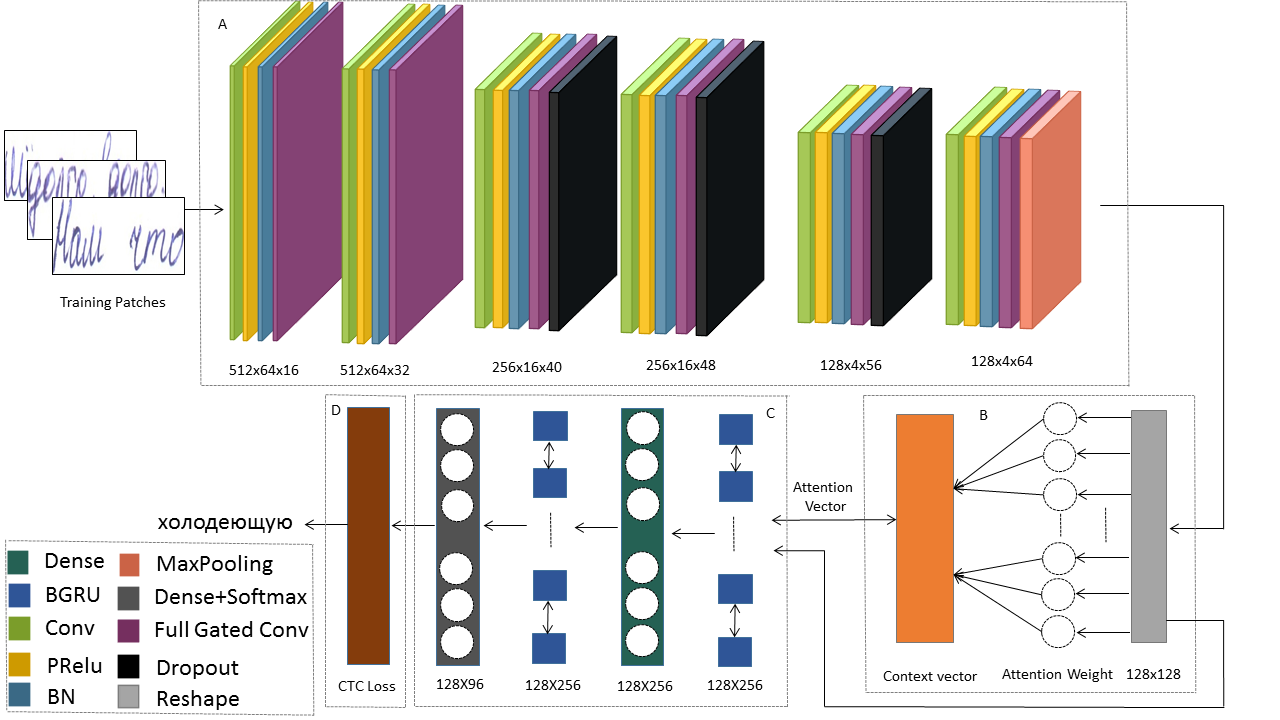

> The figure shows a diagram of the Attention-Gated-CNN-BGRU model for handwritten text recognition. The model consists of four parts: (A) encoder (CNN), (B) attention block, (C) decoder, and CTC (D). The input image is converted by the encoder into feature vectors. The attention block allows the model to focus on important parts of the image and forms a contextual vector for the decoder. The decoder processes the sequence of features to predict the sequence of characters. The CTC of the output layer is used for decoding and error counting.

A promising area of research is the implementation of the current model architectures [Conformer](https://arxiv.org/abs/2005.08100) and [RNN Transducer](https://www.microsoft.com/en-us/research/uploads/prod/2019/10/RNNT.pdf) proposed in the articles [Gulati A. et al.] and [Li J. et al.]. Conformer uses a transformer-like architecture augmented with convolutional blocks, while RNN Transducer is designed for sequence decoding and can replace CTC Loss, as it takes into account the information of the resulting sequence, unlike CTC.

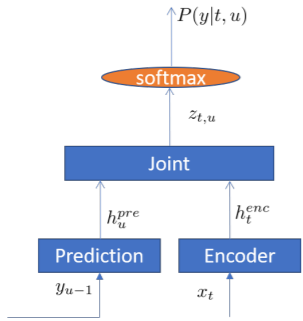

> Схема RNN-Transducer

### 5. How data and models are used for hypothesis testing

During the experiment, it is planned to train the segmentation model on Russian and English datasets.

The key *tasks* of the project include:

1. Collecting data for training from open sources.

2. Studying scientific literature relevant to solving the problem.

3. Developing the model architecture, implementing a reproducible training pipeline and validating models.

4. Evaluating the quality of work and model metrics.

5. Reporting on the work done

Potential obstacles to the implementation of the project include:

1. Lack of sufficient data in Russian to train the Russian handwriting recognition model

2. Bias in the training sample relative to real-world data, which may render the model unusable

3. Lack of necessary team competencies to create complex algorithms described in scientific articles

##References

1. Abdallah A., Hamada M., Nurseitov D. [Attention-based Fully Gated CNN-BGRU for Russian Handwritten Text](https://www.researchgate.net/publication/347845048_Attention-Based_Fully_Gated_CNN-BGRU_for_Russian_Handwritten_Text) //Journal of Imaging. – 2020. – Т. 6. – №. 12. – С. 141.

2. Gulati A. et al. [Conformer: Convolution-augmented transformer for speech recognition](https://arxiv.org/abs/2005.08100) //arXiv preprint arXiv:2005.08100. – 2020.

3. Kleber F. et al. [Cvl-database: An off-line database for writer retrieval, writer identification and word spotting //2013 12th international conference on document analysis and recognition.](https://cvl.tuwien.ac.at/research/cvl-databases/an-off-line-database-for-writer-retrieval-writer-identification-and-word-spotting/) – IEEE, 2013. – С. 560-564.

4. Nurseitov D. et al. [Handwritten Kazakh and Russian (HKR) database for text recognition](https://arxiv.org/pdf/2007.03579.pdf) //Multimedia Tools and Applications. – 2021. – С. 1-23.

5. Marti U. V., Bunke H. [The IAM-database: an English sentence database for offline handwriting recognition](https://www.researchgate.net/publication/226662568_The_IAM-database_An_English_sentence_database_for_offline_handwriting_recognition) //International Journal on Document Analysis and Recognition. – 2002. – Т. 5. – №. 1. – С. 39-46.

6. Li J. et al. [Improving RNN transducer modeling for end-to-end speech recognition](https://www.microsoft.com/en-us/research/uploads/prod/2019/10/RNNT.pdf) //2019 IEEE Automatic Speech Recognition and Understanding Workshop (ASRU). – IEEE, 2019. – С. 114-121.

# Обучение модели

## Загрузка данных и библиотек

**Links**:

- https://openspeech-team.github.io/openspeech/index.html

> Задачи для улучшения модели:
- Использовать beamsearch/LM для раскодирования
- Реализовать аугментации для обучения (albumentations)
- Попробовать другие архитектуры (Conformer)
- BPE токенайзер
- Качественнее разбить train и val (учитывая баланс классов)

In [ ]:
#@markdown Клонируем openspeech репо
#@markdown - https://github.com/openspeech-team/openspeech
# Установка пререквизитов
print('Установка...')
!pip install -q pybind11
!pip install -q warp-rnnt
!pip install -q --upgrade albumentations
# Клонируем репо
!git clone https://github.com/openspeech-team/openspeech.git &> /dev/null
%cd openspeech
# Устанавливаем. Через pip не устанавливается нормально :(
!chmod +x ./install.sh
!./install.sh &> /dev/null
%cd ..
# Добавляем в path, где python ищет модули
import sys
sys.path.append('/content/openspeech')

Установка...
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 243.3/243.3 kB 16.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
/content/openspeech
/content


In [ ]:
import json
import os
import glob
import pandas as pd


#@markdown Скачиваем HKR Dataset и IAM Handwriting Database
#@markdown - HKR Dataset: https://github.com/abdoelsayed2016/HKR_Dataset
include_hkr = True #@param {type:"boolean"}
if include_hkr:
    # Download HKR Dataset https://github.com/abdoelsayed2016/HKR_Dataset
    # !gdown добавить ссылку на гугл диск с датасетом
    # Words data:
    !gdown --id 1jfvkXqnscYxe9DjO_jJO0GJ0QGQJ8V9S
    # P@ssw0rd_HKR2020
    # !unrar x -id[q] -pP@ssw0rd_HKR2020 -Y 'HKR_Dataset_Forms_Public.rar'
    # P@ssw0rd-HKR2020
    print('Разархивирование...')
    !unrar x -id[q] -pP@ssw0rd-HKR2020 -Y 'HKR_Dataset_Words_Public.rar'

    # Разметка HKR Dataset
    path_to_files = os.path.join('./20200923_Dataset_Words_Public/img/', '*')

    info_data = []
    for filepath in glob.glob(path_to_files):
        filename = filepath.split('/')[-1]
        filename = filename.split('.')[0]
        with open(filepath.replace('img', 'ann').replace('jpg', 'json'), 'r') as f:
            ann = json.load(f)
        inf = {
            'id': filename,
            'filepath': filepath,
            'text': ann['description'],
            'lang': 'ru'
        }
        info_data.append(inf)

    hkr_data = pd.DataFrame(info_data)

#@markdown - IAM Handwriting Database https://fki.tic.heia-fr.ch/databases/iam-handwriting-database
include_iam = False #@param {type:"boolean"}
if include_iam:
    # Download IAM Handwriting Database: https://fki.tic.heia-fr.ch/databases/iam-handwriting-database
    #### Sentences ####
    # !gdown https://drive.google.com/uc?id=1RWFGzkfLCnXSxmD3ISO-Z7o5r7nE4Oqs
    # !rm -r sentences
    # !mkdir sentences
    # !tar -xf "./sentences.tgz" -C "./sentences"
    #### Lines ####
    !gdown https://drive.google.com/uc?id=1rLZ452uGAnZ6llcFZftCRqUqctU45v4w
    !rm -r lines
    !mkdir lines
    !tar -xf "./lines.tgz" -C "./lines"
    #### XML ####
    # !gdown https://drive.google.com/uc?id=12iUjehxIIB9D6tjcaSMp-HL816EYVs0z
    # !rm -r xml
    # !mkdir xml
    # !tar -xf "./xml.tgz" -C "./xml"
    #### Ascii ####
    !gdown https://drive.google.com/uc?id=1KOQvaROXNIbk7YoxFoWpVezm-BeZld9z
    !rm -r ascii
    !mkdir ascii
    !tar -xf "./ascii.tgz" -C "./ascii"

    # Разметка IAM Dataset
    info_list = []
    with open('./ascii/lines.txt', 'r') as f:
        for line in f:
            if line[0] == '#':
                continue
            l = line.split()
            filename, text = l[0], l[-1].replace('|', ' ')
            info_list.append([filename, text])

    path_to_files = os.path.join('./lines/*/*/', '*')
    path_list = []
    for filepath in glob.glob(path_to_files):
        filename = filepath.split('/')[-1]
        filename = filename.split('.')[0]
        path_list.append([filename, filepath, 'eng'])

    info_path = pd.DataFrame(path_list, columns = ['id', 'filepath', 'lang'])
    info_text = pd.DataFrame(info_list, columns = ['id', 'text'])
    iam_data = info_path.merge(info_text, 'left', 'id')
    '''iam_data.text = iam_data.text\
    .str.replace(r'(?<=\w) (?=[,.;:\'\"?])', '')\
    .str.replace('(?<=[\'\"]) (?=[~\w])', '')'''

if include_iam and include_hkr:
    all_data = hkr_data.append(iam_data).reset_index(drop=True)
elif include_iam:
    all_data = iam_data
else:
    all_data = hkr_data

all_data.drop_duplicates('text', keep='last', inplace=True)
all_data.reset_index(drop=True, inplace=True)
print('Num ru:', (all_data.lang == 'ru').sum(), 'Num eng:', (all_data.lang == 'eng').sum())
all_data

/usr/local/lib/python3.11/dist-packages/gdown/__main__.py:140: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From (original): https://drive.google.com/uc?id=1jfvkXqnscYxe9DjO_jJO0GJ0QGQJ8V9S
From (redirected): https://drive.google.com/uc?id=1jfvkXqnscYxe9DjO_jJO0GJ0QGQJ8V9S&confirm=t&uuid=2dd88d16-c836-4b2c-b341-24f26eb48c91
To: /content/HKR_Dataset_Words_Public.rar
100% 757M/757M [00:18<00:00, 40.3MB/s]
Разархивирование...
Num ru: 2808 Num eng: 0


,id,filepath,text,lang
0,1_43_637,./20200923_Dataset_Words_Public/img/1_43_637.jpg,Побелели,ru
1,3_30_210,./20200923_Dataset_Words_Public/img/3_30_210.jpg,"помчался бы, я,",ru
2,1_37_637,./20200923_Dataset_Words_Public/img/1_37_637.jpg,Моей лежит,ru
3,3_44_234,./20200923_Dataset_Words_Public/img/3_44_234.jpg,законом судьбы.,ru
4,4_3_266,./20200923_Dataset_Words_Public/img/4_3_266.jpg,Льет печалыно,ru
...,...,...,...,...
2803,11_23_29_,./20200923_Dataset_Words_Public/img/11_23_29_.jpg,Акмолинская,ru
2804,10_38_31,./20200923_Dataset_Words_Public/img/10_38_31.jpg,Западно-Казахстанская,ru
2805,4_26_297,./20200923_Dataset_Words_Public/img/4_26_297.jpg,туманы,ru
2806,6_26_780,./20200923_Dataset_Words_Public/img/6_26_780.jpg,"о подвигах, о славе",ru


In [ ]:
#@markdown Отмасштабировать картинки для ускорения обучения
import cv2
from tqdm.notebook import tqdm
import numpy as np


IMAGE_H = 128 #@param {type:"integer"}
IMAGE_W = 1024 #@param {type:"integer"}

def resize_if_need(img, max_h, max_w):
    img_h, img_w, img_c = img.shape
    coef = 1 if img_h <= max_h and img_w <= max_w else max(img_h / max_h, img_w / max_w)
    h = int(img_h / coef)
    w = int(img_w / coef)
    img = cv2.resize(img, (w, h))
    return img

def make_img_padding_right(image, max_h, max_w):
    img = image.copy()
    img_h, img_w, img_c = img.shape
    bg = np.zeros((max_h, max_w, img_c), dtype=np.uint8)
    x1 = 0  # (max_w - img_w) // 2
    y1 = (max_h - img_h) // 2
    x2 = x1 + img_w
    y2 = y1 + img_h
    bg[y1:y2, x1:x2, :] = img.copy()
    return bg

for imagepath in tqdm(all_data.filepath.values):
    image = cv2.cvtColor(cv2.imread(imagepath), cv2.COLOR_BGR2RGB)
    image = resize_if_need(image, IMAGE_H, IMAGE_W)
    image = make_img_padding_right(image, IMAGE_H, IMAGE_W)
    cv2.imwrite(imagepath, image)

  0%|          | 0/2808 [00:00<?, ?it/s]

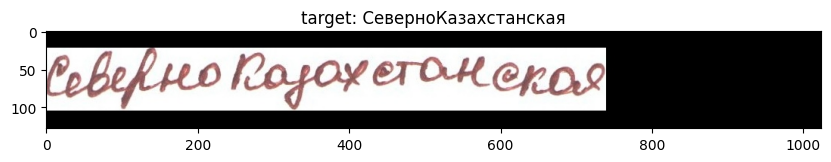

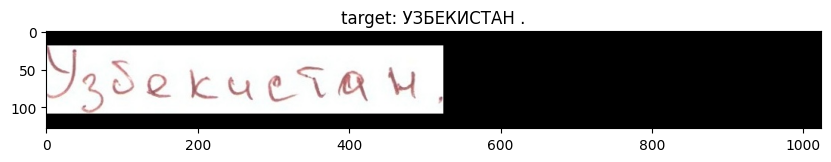

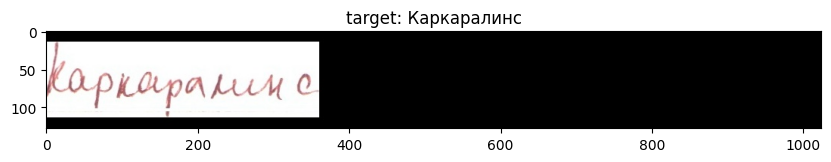

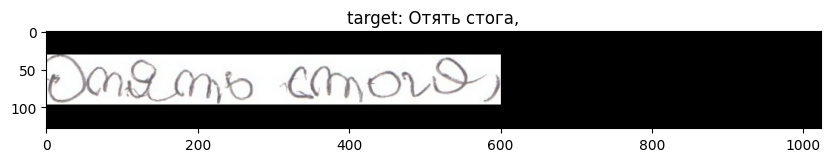

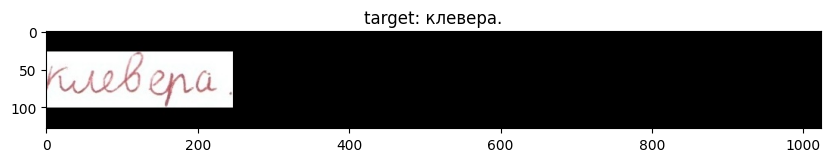

In [ ]:
#@markdown Посмотрим на данные
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

for i in all_data.iloc[np.random.choice(np.arange(len(all_data)), 5)].values:
    img=mpl.image.imread(i[1])
    plt.figure(figsize=(10,10))
    plt.imshow(img, cmap ='gray')
    plt.title('target: '+ i[2])

## Создание dataset'a и определение гиперпараметров

In [ ]:
#@markdown Импорт библиотек

import pandas as pd
import numpy as np
import torch
import torchvision
from torch import nn, Tensor
from torch.nn import functional as F
from torch.nn.utils.rnn import pad_sequence
from torch.utils.data import Dataset, DataLoader, SubsetRandomSampler
import torchvision.models as models
import json
import glob
import math
import cv2
import os
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm

%matplotlib inline

In [ ]:
#@markdown Создание словаря
# VOCAB

!pip install openspeech omegaconf pandas
!pip install pip==23.2.1
!pip install pytorch-lightning==1.5.10


BLANK_TOK = '[blk]'
EOS_TOK = '[eos]'
SOS_TOK = '[sos]'
PAD_TOK = '[pad]'

char2int = {}
int2char = {}
VOCAB = set()
for i, k in enumerate(['[pad]', '[sos]', '[eos]', '[blk]']):
    char2int[k] = i
    int2char[i] = k

for i in all_data.text:
    VOCAB.update(list(i))

VOCAB = sorted(list(VOCAB))
for i in range(len(VOCAB)):
    char2int[VOCAB[i]] = i + 4
    int2char[i + 4] = VOCAB[i]

print(''.join(int2char.values()))
pd.DataFrame([int2char]).T.to_csv('vocab.csv')


!pip install librosa==0.9.2
# Создание конфига для LSTM декодера
from omegaconf import OmegaConf
from openspeech.tokenizers.librispeech.character import LibriSpeechCharacterTokenizer

dictConfig = OmegaConf.create({
    'tokenizer': {
        'pad_token': '[pad]',
        'sos_token': '[sos]',
        'eos_token': '[eos]',
        'blank_token': '[blk]',
        'vocab_path': 'vocab.csv',
        'encoding': 'utf-8'
    }
})

tokenizer = LibriSpeechCharacterTokenizer(dictConfig)

In [ ]:
# Гиперпараметры модели
IMAGE_H, IMAGE_W = 128, 1024
DEVICE = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
VAL_SIZE = 0.1
BATCH_SIZE = 4
OCR_MODEL_PARAMS = {
    'time_feature_count': 256,
    'lstm_hidden': 256,
    'lstm_len': 3,
    'n_class': len(char2int),
    'pad_id': tokenizer.pad_id,
    'sos_id': tokenizer.sos_id,
    'eos_id': tokenizer.eos_id,
}

In [ ]:
#@markdown Создание датасета
class HWTRDataset(Dataset):
    def __init__(self, info_data, tokenizer):
        self.images = []
        self.annotations = []
        self.tokenizer = tokenizer
        for id, image_fname, text, lang in info_data.values:
            self.images.append(image_fname)
            tokens = list(map(int, tokenizer.encode(text).split(' ')))
            tokens = [self.tokenizer.sos_id] + tokens + [self.tokenizer.eos_id]
            self.annotations.append(tokens)

    def __getitem__(self, i):
        image = cv2.cvtColor(cv2.imread(self.images[i]), cv2.COLOR_BGR2RGB)
        tokens = np.array(self.annotations[i], dtype=np.int32)

        return image, tokens

    def __len__(self):
        return len(self.images)

dataset = HWTRDataset(all_data, tokenizer)

In [ ]:
#@markdown Определим аугментации
import albumentations as A
from albumentations.augmentations.dropout.coarse_dropout import CoarseDropout as Cutout


train_transforms = A.Compose([
        # A.RandomRotate90(),
        # A.Flip(),
        # A.Transpose(),
        # A.LongestMaxSize(),
        A.GaussNoise(p=0.2),
        A.OneOf([
            A.MotionBlur(p=.2),
            A.MedianBlur(blur_limit=3, p=0.1),
            A.Blur(blur_limit=3, p=0.1),
        ], p=0.2),
        A.ShiftScaleRotate(shift_limit=0.0625, scale_limit=0.05, rotate_limit=5, p=0.2),
        A.OneOf([
            A.OpticalDistortion(p=0.2),
            A.GridDistortion(p=.1),
        ], p=0.2),
        A.OneOf([
            A.CLAHE(clip_limit=2),
            A.RandomBrightnessContrast(),
        ], p=0.3),
        Cutout(max_holes=10, max_height=15, max_width=50, p=0.5),
        A.HueSaturationValue(40, 40, 35, p=0.5),
])

In [ ]:
#@markdown Разделение на train и val, создание dataloader

from functools import partial

def collate_fn(batch, transforms=None):
    img_batch, tgt_batch, seq_len, tgt_len = [], [], [], []
    for img_sample, tgt_sample in batch:
        if transforms is not None:
            img_sample = transforms(image=img_sample)['image']
        img_sample = img_sample.astype(np.float32) / 255.0
        img_sample = torch.from_numpy(img_sample).permute(2, 0, 1).unsqueeze(0)
        tgt_sample = torch.from_numpy(tgt_sample)
        img_batch.append(img_sample)
        tgt_batch.append(tgt_sample)
        seq_len.append(img_sample.shape[2])
        tgt_len.append(tgt_sample.shape[0])

    img_batch = torch.cat(img_batch)
    tgt_batch = pad_sequence(tgt_batch, padding_value=tokenizer.pad_id).T
    seq_len = torch.tensor(seq_len)
    tgt_len = torch.tensor(tgt_len)
    return img_batch, tgt_batch, seq_len, tgt_len

# Creating data indices for training and validation splits:
dataset_size = len(dataset)
indices = list(range(dataset_size))
split = int(np.floor(VAL_SIZE * dataset_size))
shuffle_dataset = True
if shuffle_dataset:
    np.random.seed(0)
    np.random.shuffle(indices)
train_indices, val_indices = indices[split:], indices[:split]

# Creating PT data samplers and loaders:
train_sampler = SubsetRandomSampler(train_indices)
valid_sampler = SubsetRandomSampler(val_indices)

train_collate_fn = partial(collate_fn, transforms=train_transforms)
val_collate_fn = partial(collate_fn, transforms=None)

train_dataloader = DataLoader(
    dataset, batch_size=BATCH_SIZE,
    num_workers=2,
    collate_fn=train_collate_fn, sampler=train_sampler
)
val_dataloader = DataLoader(
    dataset, batch_size=BATCH_SIZE,
    num_workers=2,
    collate_fn=val_collate_fn, sampler=valid_sampler
)

print('Train size:', len(train_dataloader), '; Val size:', len(val_dataloader), '(batches)')
print('English train size:', (all_data.iloc[indices[split:]].lang == 'eng').sum(),
      '; English val size:', (all_data.iloc[indices[:split]].lang == 'eng').sum())
print('Russian train size:', (all_data.iloc[indices[split:]].lang == 'ru').sum(),
      '; Russian val size:', (all_data.iloc[indices[:split]].lang == 'ru').sum())

In [ ]:
# Проверка seed: [9046, 9604, 6764, 1103, 2826]
indices[:5]

## Модели

In [ ]:
#@title Baseline model
from openspeech.decoders.lstm_attention_decoder import LSTMAttentionDecoder

class BiLSTM(nn.Module):
    def __init__(self, input_size, hidden_size, num_layers, dropout=0.1):
        super(BiLSTM, self).__init__()
        self.lstm = nn.LSTM(input_size, hidden_size, num_layers, dropout=dropout, batch_first=True, bidirectional=True)

    def forward(self, x):
        out, _ = self.lstm(x)
        return out


class RecognitionModel(nn.Module):
    def __init__(self,
                 feature_extractor,
                 time_feature_count,
                 lstm_hidden,
                 lstm_len,
                 n_class,
                 pad_id,
                 sos_id,
                 eos_id):
        super(RecognitionModel, self).__init__()
        self.feature_extractor = feature_extractor
        self.avg_pool = nn.AdaptiveAvgPool2d((time_feature_count, time_feature_count))
        self.bilstm = BiLSTM(time_feature_count, lstm_hidden, lstm_len)
        self.decoder = LSTMAttentionDecoder(
            num_classes=n_class,
            max_length=time_feature_count,
            hidden_state_dim=lstm_hidden * 2,
            pad_id=pad_id, sos_id=sos_id,
            eos_id=eos_id,
            attn_mechanism='multi-head',
            num_heads=4,
            num_layers=2,
            rnn_type='lstm',
            dropout_p=0.3
        )

    def forward(self, x, targets=None, teacher_forcing_ratio=1.0):
        x = self.encode(x)
        x_len = x.shape[1]
        x = self.decoder(x, targets, x_len, teacher_forcing_ratio)
        return x

    def encode(self, x):
        x = self.feature_extractor(x)
        b, c, h, w = x.size()
        x = x.view(b, c * h, w)
        x = self.avg_pool(x)
        feat = x.transpose(1, 2)
        x = self.bilstm(feat) # (N, L, D * H)
        return x

    def decode(self, x, x_len, targets=None, teacher_forcing_ratio=1.0):
        x = self.decoder(x, targets, x_len, teacher_forcing_ratio)
        return x


def get_resnet_backbone(pretrained=True):
    m = models.resnet34(pretrained=pretrained)
    input_conv = nn.Conv2d(3, 64, 7, 1, 3)
    blocks = [input_conv, m.bn1, m.relu, m.maxpool, m.layer1, m.layer2, m.layer3]
    return nn.Sequential(*blocks)

def get_resnet34_model(pretrained=True):
    backbone = get_resnet_backbone(pretrained)
    model = RecognitionModel(backbone, **OCR_MODEL_PARAMS)
    model = model.to(DEVICE)
    return model


recognition_model = get_resnet34_model(False)
loss_fn = torch.nn.CrossEntropyLoss(ignore_index=tokenizer.pad_id)
optimizer = torch.optim.Adam(recognition_model.parameters(), lr=0.0001, betas=(0.9, 0.98), eps=1e-9)

In [ ]:
# Загрузка весов
!gdown https://drive.google.com/uc?id=1-4VCjPF88Ns_ojGIjQ7FZdChl3cW3Vjq
recognition_model.load_state_dict(torch.load(f'/content/baseline_e{12}.pt'), strict=False)

In [ ]:
#@markdown Переопределим входную свертку под картинки

import math
import torch
import torch.nn as nn
from torch import Tensor
from typing import Tuple

from openspeech.modules.swish import Swish
from openspeech.utils import get_class_name


class Conv2dExtractor(nn.Module):
    r"""
    Provides inteface of convolutional extractor.

    Note:
        Do not use this class directly, use one of the sub classes.
        Define the 'self.conv' class variable.

    Inputs: inputs, input_lengths
        - **inputs** (batch, time, dim): Tensor containing input vectors
        - **input_lengths**: Tensor containing containing sequence lengths

    Returns: outputs, output_lengths
        - **outputs**: Tensor produced by the convolution
        - **output_lengths**: Tensor containing sequence lengths produced by the convolution
    """
    supported_activations = {
        'hardtanh': nn.Hardtanh(0, 20, inplace=True),
        'relu': nn.ReLU(inplace=True),
        'elu': nn.ELU(inplace=True),
        'leaky_relu': nn.LeakyReLU(inplace=True),
        'gelu': nn.GELU(),
        'swish': Swish(),
    }

    def __init__(self, input_dim: int, activation: str = 'hardtanh') -> None:
        super(Conv2dExtractor, self).__init__()
        self.input_dim = input_dim
        self.activation = Conv2dExtractor.supported_activations[activation]
        self.conv = None

    def get_output_lengths(self, seq_lengths: torch.Tensor):
        assert self.conv is not None, "self.conv should be defined"

        for module in self.conv:
            if isinstance(module, nn.Conv2d):
                numerator = seq_lengths + 2 * module.padding[1] - module.dilation[1] * (module.kernel_size[1] - 1) - 1
                seq_lengths = numerator.float() / float(module.stride[1])
                seq_lengths = seq_lengths.int() + 1

            elif isinstance(module, nn.MaxPool2d):
                seq_lengths >>= 1

        return seq_lengths.int()

    def get_output_dim(self):
        if get_class_name(self) == "VGGExtractor":
            output_dim = (self.input_dim - 1) << 5 if self.input_dim % 2 else self.input_dim << 5

        elif get_class_name(self) == "DeepSpeech2Extractor":
            output_dim = int(math.floor(self.input_dim + 2 * 20 - 41) / 2 + 1)
            output_dim = int(math.floor(output_dim + 2 * 10 - 21) / 2 + 1)
            output_dim <<= 5

        elif get_class_name(self) == "Conv2dSubsampling":
            factor = ((self.input_dim - 1) // 2 - 1) // 2
            output_dim = self.out_channels * factor

        else:
            raise ValueError(f"Unsupported Extractor : {self.extractor}")

        return output_dim

    def forward(self, inputs: Tensor, input_lengths: Tensor) -> Tuple[Tensor, Tensor]:
        r"""
        inputs: torch.FloatTensor (batch, time, dimension)
        input_lengths: torch.IntTensor (batch)
        """
        outputs, output_lengths = self.conv(inputs, input_lengths) # !!! .unsqueeze(1).transpose(2, 3)

        batch_size, channels, dimension, seq_lengths = outputs.size()
        outputs = outputs.permute(0, 3, 1, 2)
        outputs = outputs.view(batch_size, seq_lengths, channels * dimension)

        return outputs, output_lengths


class Conv2dSubsampling(Conv2dExtractor):
    r"""
    Convolutional 2D subsampling (to 1/4 length)

    Args:
        input_dim (int): Dimension of input vector
        in_channels (int): Number of channels in the input vector
        out_channels (int): Number of channels produced by the convolution
        activation (str): Activation function

    Inputs: inputs
        - **inputs** (batch, time, dim): Tensor containing sequence of inputs
        - **input_lengths** (batch): list of sequence input lengths

    Returns: outputs, output_lengths
        - **outputs** (batch, time, dim): Tensor produced by the convolution
        - **output_lengths** (batch): list of sequence output lengths
    """
    def __init__(
            self,
            input_dim: int,
            in_channels: int,
            out_channels: int,
            activation: str = 'relu',
    ) -> None:
        super(Conv2dSubsampling, self).__init__(input_dim, activation)
        self.in_channels = in_channels
        self.out_channels = out_channels
        from openspeech.modules import MaskConv2d
        self.conv = MaskConv2d(
            nn.Sequential(
                nn.Conv2d(in_channels, out_channels, kernel_size=3, stride=2),
                self.activation,
                nn.Conv2d(out_channels, out_channels, kernel_size=3, stride=2),
                self.activation,
            )
        )

    def forward(self, inputs: torch.Tensor, input_lengths: torch.Tensor) -> Tuple[torch.Tensor, torch.Tensor]:
        outputs, input_lengths = super().forward(inputs, input_lengths)
        output_lengths = input_lengths >> 2
        output_lengths -= 1
        return outputs, output_lengths

In [ ]:
#@title Conformer Transducer Model
from openspeech.models.conformer.model import ConformerTransducerModel
from omegaconf import OmegaConf
import pytorch_lightning as pl

dictConfig = OmegaConf.create({
    'tokenizer': {
        'pad_token': '[pad]',
        'sos_token': '[sos]',
        'eos_token': '[eos]',
        'blank_token': '[blk]',
        'vocab_path': 'vocab.csv',
        'encoding': 'utf-8'
    },
    'audio': {
        'num_mels': 128,
    },
    'model': {
        'encoder_dim': 256, # 512,
        'feed_forward_expansion_factor': 4,
        'num_encoder_layers': 10, # 17,
        'num_attention_heads': 8,
        'conv_expansion_factor': 2,
        'feed_forward_dropout_p': 0.1,
        'input_dropout_p': 0.1,
        'attention_dropout_p': 0.1,
        'conv_dropout_p': 0.1,
        'conv_kernel_size': 31,
        'half_step_residual': True,
        'num_decoder_layers': 1,
        'decoder_dropout_p': 0.1,
        'max_length': 256,
        'teacher_forcing_ratio': 1.0,
        'rnn_type': 'lstm',
        'decoder_hidden_state_dim': 256, # 640,
        'decoder_output_dim': 256, # 640,
        'optimizer': 'adam',
    },
    'trainer': {
        'name': 'gpu',
        'seed': 140921,
        'use_cuda': True,
        'gradient_clip_val': 0,
    },
    'criterion': {
        'criterion_name': 'transducer',
        'reduction': 'mean',
        'gather': True,
    },
    'lr_scheduler': {
        'scheduler_name': 'reduce_lr_on_plateau',
        'lr': 0.0004,
        'lr_patience': 1,
        'lr_factor': 0.5,
    }
})

load_conformer = False #@param {type:"boolean"}

if load_conformer:
    conformer = ConformerTransducerModel(dictConfig, tokenizer)
    conformer.build_model()
    # Replace input layer
    conformer.encoder.conv_subsample = Conv2dSubsampling(dictConfig.audio.num_mels,
                                                        in_channels=3,
                                                        out_channels=dictConfig.model.encoder_dim)
    conformer.configure_optimizers()
    conformer.to(DEVICE)

    from pytorch_lightning.callbacks import ModelCheckpoint

    checkpoint_callback = ModelCheckpoint(
        monitor="val_loss",
        dirpath="/content/drive/MyDrive/Datasets/ckpt/pl",
        filename="conformer-{epoch:02d}-{val_loss:.2f}",
        save_top_k=3,
        mode="min",
    )
    trainer = pl.Trainer(gpus=1, callbacks=[checkpoint_callback])

## Обучение

In [ ]:
# Обучение conformer...
# trainer.fit(conformer,
#             train_dataloaders=train_dataloader,
#             val_dataloaders=val_dataloader)

In [ ]:
#@markdown train и val функции

def train_epoch(model, optimizer, train_dataloader):
    model.train()
    losses = 0

    with tqdm(total=len(train_dataloader)) as pbar:
        for img, tgt, img_len, tgt_len in train_dataloader:
            img = img.to(DEVICE)
            tgt = tgt.to(DEVICE)
            # tgt_len = tgt_len.to(DEVICE)

            tgt_out = tgt[:, 1:]
            logits = model(img, tgt, teacher_forcing_ratio=1.0)

            optimizer.zero_grad()

            loss = loss_fn(logits.reshape(-1, logits.shape[2]),
                           tgt_out.reshape(-1).long())
            loss.backward()

            optimizer.step()
            losses += loss.item()

            pbar.set_description('Loss: {:.2f}'.format(loss.cpu().item()))
            pbar.update(1)

    return losses / len(train_dataloader)


from openspeech.metrics import CharacterErrorRate, WordErrorRate
CER, WER = CharacterErrorRate(tokenizer), WordErrorRate(tokenizer)

def evaluate(model, val_dataloader):
    model.eval()
    losses = 0
    cers = 0
    wers = 0

    with torch.no_grad():
        with tqdm(total=len(val_dataloader)) as pbar:
            for img, tgt, img_len, tgt_len in val_dataloader:
                img = img.to(DEVICE)
                tgt = tgt.to(DEVICE)
                # tgt_len = tgt_len.to(DEVICE)

                tgt_out = tgt[:, 1:]
                logits = model(img, tgt, teacher_forcing_ratio=0)

                loss = loss_fn(logits.reshape(-1, logits.shape[2]),
                              tgt_out.reshape(-1).long())

                predicted_tokens = logits.argmax(2).cpu()
                predicted_texts = tokenizer.decode(predicted_tokens)
                ground_truth_texts = tokenizer.decode(tgt_out.cpu())

                metrics = [CER.metric(ground_truth_texts[i], predicted_texts[i]) for i in range(BATCH_SIZE)]
                cer = sum([dist / length for dist, length in metrics]) / len(metrics)
                metrics = [WER.metric(ground_truth_texts[i], predicted_texts[i]) for i in range(BATCH_SIZE)]
                wer = sum([dist / length for dist, length in metrics]) / len(metrics)

                losses += loss.item()
                cers += cer
                wers += wer

                pbar.set_description(f'Loss: {loss.cpu().item():.2f}, CER: {cer:.2f}, WER: {wer:.2f}')
                pbar.update(1)


    return losses / len(val_dataloader), cers / len(val_dataloader), wers / len(val_dataloader)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
# Обучение...
NUM_EPOCHS = 20

for epoch in range(16, NUM_EPOCHS+1):
    train_loss = train_epoch(recognition_model, optimizer, train_dataloader)
    torch.save(recognition_model.state_dict(), f'./drive/MyDrive/Datasets/ckpt/baseline_tf_e{epoch}.pt')
    val_loss, avg_cer, avg_wer = evaluate(recognition_model, val_dataloader)
    print((f"Epoch: {epoch}, Train loss: {train_loss:.3f}, Valuation loss: {val_loss:.3f}, CER: {avg_cer:.3f}, WER: {avg_wer:.3f}"))

In [ ]:
#@title Результаты
from openspeech.metrics import CharacterErrorRate, WordErrorRate
CER, WER = CharacterErrorRate(tokenizer), WordErrorRate(tokenizer)

images, targets, _, _ = next(iter(val_dataloader))
images = images.to(DEVICE)

recognition_model.eval()
with torch.no_grad():

    prediction = recognition_model(images, teacher_forcing_ratio=0.0)

predicted_tokens = prediction.argmax(2).cpu()
predicted_texts = tokenizer.decode(predicted_tokens)
ground_truth_texts = tokenizer.decode(targets[:, 1:])

for i, img in enumerate(images.cpu()):
    img = img.permute(1, 2, 0)
    plt.figure(figsize=(10, 15))
    plt.imshow(img)
    dist, length = CER.metric(ground_truth_texts[i], predicted_texts[i])
    cer = dist / length
    dist, length = WER.metric(ground_truth_texts[i], predicted_texts[i])
    wer = dist / length
    plt.title('prediction: ' + predicted_texts[i] + '\n' +\
              'ground truth: ' + ground_truth_texts[i] + '\n' +\
              'CER: ' + f'{cer:.3f}' + '; WER: ' + f'{wer:.3f}')

### Добавим beam search

In [ ]:
#@markdown Поправим функции для работы с ГПУ
import torch
import torch.nn as nn

from openspeech.decoders import LSTMAttentionDecoder


class OpenspeechBeamSearchBase(nn.Module):
    """
    Openspeech's beam-search base class. Implement the methods required for beamsearch.
    You have to implement `forward` method.

    Note:
        Do not use this class directly, use one of the sub classes.
    """
    def __init__(self, decoder, beam_size: int, device):
        super(OpenspeechBeamSearchBase, self).__init__()
        self.decoder = decoder
        self.beam_size = beam_size
        self.device = device
        self.sos_id = decoder.sos_id
        self.pad_id = decoder.pad_id
        self.eos_id = decoder.eos_id
        self.ongoing_beams = None
        self.cumulative_ps = None
        self.forward_step = decoder.forward_step

    def _inflate(self, tensor: torch.Tensor, n_repeat: int, dim: int) -> torch.Tensor:
        repeat_dims = [1] * len(tensor.size())
        repeat_dims[dim] *= n_repeat
        return tensor.repeat(*repeat_dims)

    def _get_successor(
            self,
            current_ps: torch.Tensor,
            current_vs: torch.Tensor,
            finished_ids: tuple,
            num_successor: int,
            eos_count: int,
            k: int
    ) -> int:
        finished_batch_idx, finished_idx = finished_ids

        successor_ids = current_ps.topk(k + num_successor)[1]
        successor_idx = successor_ids[finished_batch_idx, -1]

        successor_p = current_ps[finished_batch_idx, successor_idx]
        successor_v = current_vs[finished_batch_idx, successor_idx].to(self.device)

        prev_status_idx = (successor_idx // k)
        prev_status = self.ongoing_beams[finished_batch_idx, prev_status_idx]
        prev_status = prev_status.view(-1)[:-1].to(self.device)

        successor = torch.cat([prev_status, successor_v.view(1)])

        if int(successor_v) == self.eos_id:
            self.finished[finished_batch_idx].append(successor)
            self.finished_ps[finished_batch_idx].append(successor_p)
            eos_count = self._get_successor(
                current_ps=current_ps,
                current_vs=current_vs,
                finished_ids=finished_ids,
                num_successor=num_successor + eos_count,
                eos_count=eos_count + 1,
                k=k,
            )

        else:
            self.ongoing_beams[finished_batch_idx, finished_idx] = successor
            self.cumulative_ps[finished_batch_idx, finished_idx] = successor_p

        return eos_count

    def _get_hypothesis(self):
        predictions = list()

        for batch_idx, batch in enumerate(self.finished):
            # if there is no terminated sentences, bring ongoing sentence which has the highest probability instead
            if len(batch) == 0:
                prob_batch = self.cumulative_ps[batch_idx]
                top_beam_idx = int(prob_batch.topk(1)[1])
                predictions.append(self.ongoing_beams[batch_idx, top_beam_idx])

            # bring highest probability sentence
            else:
                top_beam_idx = int(torch.FloatTensor(self.finished_ps[batch_idx]).topk(1)[1])
                predictions.append(self.finished[batch_idx][top_beam_idx])

        predictions = self._fill_sequence(predictions)
        return predictions

    def _is_all_finished(self, k: int) -> bool:
        for done in self.finished:
            if len(done) < k:
                return False

        return True

    def _fill_sequence(self, y_hats: list) -> torch.Tensor:
        batch_size = len(y_hats)
        max_length = -1

        for y_hat in y_hats:
            if len(y_hat) > max_length:
                max_length = len(y_hat)

        matched = torch.zeros((batch_size, max_length), dtype=torch.long)

        for batch_idx, y_hat in enumerate(y_hats):
            matched[batch_idx, :len(y_hat)] = y_hat
            matched[batch_idx, len(y_hat):] = int(self.pad_id)

        return matched

    def forward(self, *args, **kwargs):
        raise NotImplementedError


class BeamSearchLSTM(OpenspeechBeamSearchBase):
    r"""
    LSTM Beam Search Decoder

    Args: decoder, beam_size, batch_size
        decoder (DecoderLSTM): base decoder of lstm model.
        beam_size (int): size of beam.

    Inputs: encoder_outputs, targets, encoder_output_lengths, teacher_forcing_ratio
        encoder_outputs (torch.FloatTensor): A output sequence of encoders. `FloatTensor` of size ``(batch, seq_length, dimension)``
        targets (torch.LongTensor): A target sequence passed to decoders. `IntTensor` of size ``(batch, seq_length)``
        encoder_output_lengths (torch.LongTensor): A encoder output lengths sequence. `LongTensor` of size ``(batch)``
        teacher_forcing_ratio (float): Ratio of teacher forcing.

    Returns:
        * logits (torch.FloatTensor): Log probability of model predictions.
    """
    def __init__(self, decoder: LSTMAttentionDecoder, beam_size: int, device):
        super(BeamSearchLSTM, self).__init__(decoder, beam_size, device)
        self.hidden_state_dim = decoder.hidden_state_dim
        self.num_layers = decoder.num_layers
        self.validate_args = decoder.validate_args

    def forward(
            self,
            encoder_outputs: torch.Tensor,
            encoder_output_lengths: torch.Tensor,
    ) -> torch.Tensor:
        r"""
        Beam search decoding.

        Inputs: encoder_outputs
            encoder_outputs (torch.FloatTensor): A output sequence of encoders. `FloatTensor` of size ``(batch, seq_length, dimension)``

        Returns:
            * logits (torch.FloatTensor): Log probability of model predictions.
        """
        batch_size, hidden_states = encoder_outputs.size(0), None

        self.finished = [[] for _ in range(batch_size)]
        self.finished_ps = [[] for _ in range(batch_size)]

        inputs, batch_size, max_length = self.validate_args(None, encoder_outputs, teacher_forcing_ratio=0.0)

        step_outputs, hidden_states, attn = self.forward_step(inputs, hidden_states, encoder_outputs)
        self.cumulative_ps, self.ongoing_beams = step_outputs.topk(self.beam_size)

        self.ongoing_beams = self.ongoing_beams.view(batch_size * self.beam_size, 1)
        self.cumulative_ps = self.cumulative_ps.view(batch_size * self.beam_size, 1)

        input_var = self.ongoing_beams

        encoder_dim = encoder_outputs.size(2)
        encoder_outputs = self._inflate(encoder_outputs, self.beam_size, dim=0)
        encoder_outputs = encoder_outputs.view(self.beam_size, batch_size, -1, encoder_dim)
        encoder_outputs = encoder_outputs.transpose(0, 1)
        encoder_outputs = encoder_outputs.reshape(batch_size * self.beam_size, -1, encoder_dim)

        if attn is not None:
            attn = self._inflate(attn, self.beam_size, dim=0)

        if isinstance(hidden_states, tuple):
            hidden_states = tuple([self._inflate(h, self.beam_size, 1) for h in hidden_states])
        else:
            hidden_states = self._inflate(hidden_states, self.beam_size, 1)

        for di in range(max_length - 1):
            if self._is_all_finished(self.beam_size):
                break

            if isinstance(hidden_states, tuple):
                tuple(h.view(self.num_layers, batch_size * self.beam_size, self.hidden_state_dim) for h in hidden_states)
            else:
                hidden_states = hidden_states.view(self.num_layers, batch_size * self.beam_size, self.hidden_state_dim)
            step_outputs, hidden_states, attn = self.forward_step(input_var, hidden_states, encoder_outputs, attn)

            step_outputs = step_outputs.view(batch_size, self.beam_size, -1)
            current_ps, current_vs = step_outputs.topk(self.beam_size)

            self.cumulative_ps = self.cumulative_ps.view(batch_size, self.beam_size)
            self.ongoing_beams = self.ongoing_beams.view(batch_size, self.beam_size, -1)

            current_ps = (current_ps.permute(0, 2, 1) + self.cumulative_ps.unsqueeze(1)).permute(0, 2, 1)
            current_ps = current_ps.view(batch_size, self.beam_size ** 2)
            current_vs = current_vs.view(batch_size, self.beam_size ** 2)

            self.cumulative_ps = self.cumulative_ps.view(batch_size, self.beam_size)
            self.ongoing_beams = self.ongoing_beams.view(batch_size, self.beam_size, -1)

            topk_current_ps, topk_status_ids = current_ps.topk(self.beam_size)
            prev_status_ids = (topk_status_ids // self.beam_size)

            topk_current_vs = torch.zeros((batch_size, self.beam_size), dtype=torch.long)
            prev_status = torch.zeros(self.ongoing_beams.size(), dtype=torch.long)

            for batch_idx, batch in enumerate(topk_status_ids):
                for idx, topk_status_idx in enumerate(batch):
                    topk_current_vs[batch_idx, idx] = current_vs[batch_idx, topk_status_idx]
                    prev_status[batch_idx, idx] = self.ongoing_beams[batch_idx, prev_status_ids[batch_idx, idx]]

            self.ongoing_beams = torch.cat([prev_status, topk_current_vs.unsqueeze(2)], dim=2)
            self.cumulative_ps = topk_current_ps

            if torch.any(topk_current_vs == self.eos_id):
                finished_ids = torch.where(topk_current_vs == self.eos_id)
                num_successors = [1] * batch_size

                for (batch_idx, idx) in zip(*finished_ids):
                    self.finished[batch_idx].append(self.ongoing_beams[batch_idx, idx])
                    self.finished_ps[batch_idx].append(self.cumulative_ps[batch_idx, idx])

                    if self.beam_size != 1:
                        eos_count = self._get_successor(
                            current_ps=current_ps,
                            current_vs=current_vs,
                            finished_ids=(batch_idx, idx),
                            num_successor=num_successors[batch_idx],
                            eos_count=1,
                            k=self.beam_size,
                        )
                        num_successors[batch_idx] += eos_count

            input_var = self.ongoing_beams[:, :, -1]
            input_var = input_var.view(batch_size * self.beam_size, -1).to(self.device)

        return self._get_hypothesis()

In [ ]:
# Создадим BeamSearchDecoder
recognition_model.beam_search = BeamSearchLSTM(
    recognition_model.decoder, beam_size=3, device=DEVICE)

In [ ]:
#@title Валидация с BeamSearch
#@markdown > Сам по себе BS портит скор...
def evaluate_beam(model, val_dataloader):
    model.eval()
    losses = 0
    cers = 0
    wers = 0

    with torch.no_grad():
        with tqdm(total=len(val_dataloader)) as pbar:
            for img, tgt, img_len, tgt_len in val_dataloader:
                img = img.to(DEVICE)
                tgt = tgt.to(DEVICE)
                # tgt_len = tgt_len.to(DEVICE)

                encoder_output = recognition_model.encode(img)
                output_len = torch.tensor(BATCH_SIZE*[encoder_output.shape[1]], device=DEVICE)
                prediction = recognition_model.beam_search(encoder_output, output_len)

                predicted_texts = [tokenizer.decode(i[i != 0]) for i in prediction]
                ground_truth_texts = tokenizer.decode(tgt[:, 1:])

                metrics = [CER.metric(ground_truth_texts[i], predicted_texts[i]) for i in range(BATCH_SIZE)]
                cer = sum([dist / length for dist, length in metrics]) / len(metrics)
                metrics = [WER.metric(ground_truth_texts[i], predicted_texts[i]) for i in range(BATCH_SIZE)]
                wer = sum([dist / length for dist, length in metrics]) / len(metrics)

                cers += cer
                wers += wer

                pbar.set_description(f'CER: {cer:.2f}, WER: {wer:.2f}')
                pbar.update(1)


    return cers / len(val_dataloader), wers / len(val_dataloader)

cer, wer = evaluate_beam(recognition_model, val_dataloader)
print(f'CER: {cer}; WER: {wer}')

In [ ]:
#@title Результаты
images, targets, _, _ = next(iter(val_dataloader))
images = images.to(DEVICE)

recognition_model.eval()
with torch.no_grad():

    encoder_output = recognition_model.encode(images)
    output_len = torch.tensor(BATCH_SIZE*[encoder_output.shape[1]], device=DEVICE)
    prediction = recognition_model.beam_search(encoder_output, output_len)

predicted_texts = [tokenizer.decode(i[i != 0]) for i in prediction]
ground_truth_texts = tokenizer.decode(targets[:, 1:])

for i, img in enumerate(images.cpu()):
    img = img.permute(1, 2, 0)
    plt.figure(figsize=(10, 15))
    plt.imshow(img)
    dist, length = CER.metric(ground_truth_texts[i], predicted_texts[i])
    cer = dist / length
    dist, length = WER.metric(ground_truth_texts[i], predicted_texts[i])
    wer = dist / length
    plt.title('prediction: ' + predicted_texts[i] + '\n' +\
              'ground truth: ' + ground_truth_texts[i] + '\n' +\
              'CER: ' + f'{cer:.3f}' + '; WER: ' + f'{wer:.3f}')

### Обучим лингвистическую модель

In [ ]:
with open('lm.txt', 'w') as f:
    for line in all_data.text.values:
        f.write(line + '\n')

In [ ]:
with open('labels.txt', 'w') as f:
    for char in char2int.keys():
        f.write(char + '\n')

In [ ]:
!python ./openspeech/openspeech_cli/hydra_lm_train.py \
    dataset=lm \
    dataset.dataset_path=./lm.txt \
    tokenizer=kspon_character \
    tokenizer.vocab_path=./vocab.csv \
    model=lstm_lm \
    lr_scheduler=tri_stage \
    trainer=gpu \
    criterion=perplexity

In [ ]:
#@markdown LM Config
dictLMConfig = OmegaConf.create('''dataset:
  dataset: lm
  dataset_path: ./lm.txt
  valid_ratio: 0.05
  test_ratio: 0.05
criterion:
  criterion_name: perplexity
  reduction: mean
lr_scheduler:
  lr: 0.0001
  scheduler_name: tri_stage
  init_lr: 1.0e-07
  init_lr_scale: 0.01
  final_lr_scale: 0.01
  phase_ratio: (0.1, 0.4, 0.5)
  total_steps: 400000
model:
  model_name: lstm_lm
  num_layers: 3
  hidden_state_dim: 512
  dropout_p: 0.3
  rnn_type: lstm
  max_length: 128
  teacher_forcing_ratio: 1.0
  optimizer: adam
trainer:
  seed: 1
  accelerator: dp
  accumulate_grad_batches: 1
  num_workers: 4
  batch_size: 32
  check_val_every_n_epoch: 1
  gradient_clip_val: 5.0
  logger: wandb
  max_epochs: 20
  save_checkpoint_n_steps: 10000
  auto_scale_batch_size: binsearch
  sampler: smart
  name: gpu
  device: gpu
  use_cuda: true
  auto_select_gpus: true
tokenizer:
  sos_token: '[sos]'
  eos_token: '[eos]'
  pad_token: '[pad]'
  blank_token: '[blk]'
  encoding: utf-8
  unit: kspon_character
  vocab_path: ./vocab.csv''')

In [ ]:
#@markdown Код для обучения
import os
import hydra
import pytorch_lightning as pl
from omegaconf import DictConfig, OmegaConf
from pytorch_lightning.utilities import rank_zero_info

from openspeech.dataclass.initialize import hydra_lm_train_init
from openspeech.datasets import DATA_MODULE_REGISTRY
from openspeech.models import MODEL_REGISTRY
from openspeech.utils import parse_configs, get_pl_trainer


@hydra.main(config_path=os.path.join("..", "openspeech", "configs"), config_name="lm_train")
def hydra_main(configs: DictConfig) -> None:
    rank_zero_info(OmegaConf.to_yaml(configs))
    pl.seed_everything(configs.trainer.seed)

    logger, num_devices = parse_configs(configs)

    data_module = DATA_MODULE_REGISTRY[configs.dataset.dataset](configs)
    tokenizer = data_module.prepare_data()
    data_module.setup(tokenizer=tokenizer)

    model = MODEL_REGISTRY[configs.model.model_name](configs=configs, tokenizer=tokenizer)
    model.build_model()

    trainer = get_pl_trainer(configs, num_devices, logger)
    trainer.fit(model, data_module)
    trainer.test()


if __name__ == '__main__':
    hydra_lm_train_init()
    hydra_main(dictLMConfig)

# Инференс

In [ ]:
#@markdown Клонируем openspeech репо
#@markdown - https://github.com/openspeech-team/openspeech
# Установка пререквизитов
print('Установка...')
!pip install -q pybind11
!pip install -q warp-rnnt
!pip install -q --upgrade albumentations
# Клонируем репо
!git clone https://github.com/openspeech-team/openspeech.git &> /dev/null
%cd openspeech
# Устанавливаем. Через pip не устанавливается нормально :(
!chmod +x ./install.sh
!./install.sh &> /dev/null
%cd ..
# Добавляем в path, где python ищет модули
import sys
sys.path.append('/content/openspeech')
# Скачать словарь
!gdown https://drive.google.com/uc?id=1xNpIOrQZgnyTfa-8yjsiVaiTyL-mLshK
# Функция для разметки
!rm -r utils
!mkdir utils
%cd utils
!wget https://raw.githubusercontent.com/tensorflow/models/master/research/object_detection/utils/colab_utils.py &> /dev/null
%cd ..

In [ ]:
#@markdown Импорт библиотек, определение гиперпараметров
import pandas as pd
import numpy as np
import torch
import torchvision
from torch import nn, Tensor
from torch.nn import functional as F
from torch.nn.utils.rnn import pad_sequence
from torch.utils.data import Dataset, DataLoader, SubsetRandomSampler
import torchvision.models as models
import json
import glob
import math
import cv2
import os
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm

%matplotlib inline

def resize_if_need(img, max_h, max_w):
    img_h, img_w, img_c = img.shape
    coef = 1 if img_h <= max_h and img_w <= max_w else max(img_h / max_h, img_w / max_w)
    h = int(img_h / coef)
    w = int(img_w / coef)
    img = cv2.resize(img, (w, h))
    return img

def make_img_padding_right(image, max_h, max_w):
    img = image.copy()
    img_h, img_w, img_c = img.shape
    bg = np.zeros((max_h, max_w, img_c), dtype=np.uint8)
    x1 = 0  # (max_w - img_w) // 2
    y1 = (max_h - img_h) // 2
    x2 = x1 + img_w
    y2 = y1 + img_h
    bg[y1:y2, x1:x2, :] = img.copy()
    return bg

# Создание конфига для словаря
from omegaconf import OmegaConf
from openspeech.tokenizers.librispeech.character import LibriSpeechCharacterTokenizer

dictConfig = OmegaConf.create({
    'tokenizer': {
        'pad_token': '[pad]',
        'sos_token': '[sos]',
        'eos_token': '[eos]',
        'blank_token': '[blk]',
        'vocab_path': 'vocab.csv',
        'encoding': 'utf-8'
    }
})

tokenizer = LibriSpeechCharacterTokenizer(dictConfig)

# Гиперпараметры модели
IMAGE_H = 128 #@param {type:"integer"}
IMAGE_W = 1024 #@param {type:"integer"}
DEVICE = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
VAL_SIZE = 0.1
BATCH_SIZE = 4
OCR_MODEL_PARAMS = {
    'time_feature_count': 256,
    'lstm_hidden': 256,
    'lstm_len': 3,
    'n_class': len(tokenizer.labels),
    'pad_id': tokenizer.pad_id,
    'sos_id': tokenizer.sos_id,
    'eos_id': tokenizer.eos_id,
}

In [ ]:
#@markdown Поправим функции для работы с ГПУ
import torch
import torch.nn as nn

from openspeech.decoders import LSTMAttentionDecoder


class OpenspeechBeamSearchBase(nn.Module):
    """
    Openspeech's beam-search base class. Implement the methods required for beamsearch.
    You have to implement `forward` method.

    Note:
        Do not use this class directly, use one of the sub classes.
    """
    def __init__(self, decoder, beam_size: int, device):
        super(OpenspeechBeamSearchBase, self).__init__()
        self.decoder = decoder
        self.beam_size = beam_size
        self.device = device
        self.sos_id = decoder.sos_id
        self.pad_id = decoder.pad_id
        self.eos_id = decoder.eos_id
        self.ongoing_beams = None
        self.cumulative_ps = None
        self.forward_step = decoder.forward_step

    def _inflate(self, tensor: torch.Tensor, n_repeat: int, dim: int) -> torch.Tensor:
        repeat_dims = [1] * len(tensor.size())
        repeat_dims[dim] *= n_repeat
        return tensor.repeat(*repeat_dims)

    def _get_successor(
            self,
            current_ps: torch.Tensor,
            current_vs: torch.Tensor,
            finished_ids: tuple,
            num_successor: int,
            eos_count: int,
            k: int
    ) -> int:
        finished_batch_idx, finished_idx = finished_ids

        successor_ids = current_ps.topk(k + num_successor)[1]
        successor_idx = successor_ids[finished_batch_idx, -1]

        successor_p = current_ps[finished_batch_idx, successor_idx]
        successor_v = current_vs[finished_batch_idx, successor_idx].to(self.device)

        prev_status_idx = (successor_idx // k)
        prev_status = self.ongoing_beams[finished_batch_idx, prev_status_idx]
        prev_status = prev_status.view(-1)[:-1].to(self.device)

        successor = torch.cat([prev_status, successor_v.view(1)])

        if int(successor_v) == self.eos_id:
            self.finished[finished_batch_idx].append(successor)
            self.finished_ps[finished_batch_idx].append(successor_p)
            eos_count = self._get_successor(
                current_ps=current_ps,
                current_vs=current_vs,
                finished_ids=finished_ids,
                num_successor=num_successor + eos_count,
                eos_count=eos_count + 1,
                k=k,
            )

        else:
            self.ongoing_beams[finished_batch_idx, finished_idx] = successor
            self.cumulative_ps[finished_batch_idx, finished_idx] = successor_p

        return eos_count

    def _get_hypothesis(self):
        predictions = list()

        for batch_idx, batch in enumerate(self.finished):
            # if there is no terminated sentences, bring ongoing sentence which has the highest probability instead
            if len(batch) == 0:
                prob_batch = self.cumulative_ps[batch_idx]
                top_beam_idx = int(prob_batch.topk(1)[1])
                predictions.append(self.ongoing_beams[batch_idx, top_beam_idx])

            # bring highest probability sentence
            else:
                top_beam_idx = int(torch.FloatTensor(self.finished_ps[batch_idx]).topk(1)[1])
                predictions.append(self.finished[batch_idx][top_beam_idx])

        predictions = self._fill_sequence(predictions)
        return predictions

    def _is_all_finished(self, k: int) -> bool:
        for done in self.finished:
            if len(done) < k:
                return False

        return True

    def _fill_sequence(self, y_hats: list) -> torch.Tensor:
        batch_size = len(y_hats)
        max_length = -1

        for y_hat in y_hats:
            if len(y_hat) > max_length:
                max_length = len(y_hat)

        matched = torch.zeros((batch_size, max_length), dtype=torch.long)

        for batch_idx, y_hat in enumerate(y_hats):
            matched[batch_idx, :len(y_hat)] = y_hat
            matched[batch_idx, len(y_hat):] = int(self.pad_id)

        return matched

    def forward(self, *args, **kwargs):
        raise NotImplementedError


class BeamSearchLSTM(OpenspeechBeamSearchBase):
    r"""
    LSTM Beam Search Decoder

    Args: decoder, beam_size, batch_size
        decoder (DecoderLSTM): base decoder of lstm model.
        beam_size (int): size of beam.

    Inputs: encoder_outputs, targets, encoder_output_lengths, teacher_forcing_ratio
        encoder_outputs (torch.FloatTensor): A output sequence of encoders. `FloatTensor` of size ``(batch, seq_length, dimension)``
        targets (torch.LongTensor): A target sequence passed to decoders. `IntTensor` of size ``(batch, seq_length)``
        encoder_output_lengths (torch.LongTensor): A encoder output lengths sequence. `LongTensor` of size ``(batch)``
        teacher_forcing_ratio (float): Ratio of teacher forcing.

    Returns:
        * logits (torch.FloatTensor): Log probability of model predictions.
    """
    def __init__(self, decoder: LSTMAttentionDecoder, beam_size: int, device):
        super(BeamSearchLSTM, self).__init__(decoder, beam_size, device)
        self.hidden_state_dim = decoder.hidden_state_dim
        self.num_layers = decoder.num_layers
        self.validate_args = decoder.validate_args

    def forward(
            self,
            encoder_outputs: torch.Tensor,
            encoder_output_lengths: torch.Tensor,
    ) -> torch.Tensor:
        r"""
        Beam search decoding.

        Inputs: encoder_outputs
            encoder_outputs (torch.FloatTensor): A output sequence of encoders. `FloatTensor` of size ``(batch, seq_length, dimension)``

        Returns:
            * logits (torch.FloatTensor): Log probability of model predictions.
        """
        batch_size, hidden_states = encoder_outputs.size(0), None

        self.finished = [[] for _ in range(batch_size)]
        self.finished_ps = [[] for _ in range(batch_size)]

        inputs, batch_size, max_length = self.validate_args(None, encoder_outputs, teacher_forcing_ratio=0.0)

        step_outputs, hidden_states, attn = self.forward_step(inputs, hidden_states, encoder_outputs)
        self.cumulative_ps, self.ongoing_beams = step_outputs.topk(self.beam_size)

        self.ongoing_beams = self.ongoing_beams.view(batch_size * self.beam_size, 1)
        self.cumulative_ps = self.cumulative_ps.view(batch_size * self.beam_size, 1)

        input_var = self.ongoing_beams

        encoder_dim = encoder_outputs.size(2)
        encoder_outputs = self._inflate(encoder_outputs, self.beam_size, dim=0)
        encoder_outputs = encoder_outputs.view(self.beam_size, batch_size, -1, encoder_dim)
        encoder_outputs = encoder_outputs.transpose(0, 1)
        encoder_outputs = encoder_outputs.reshape(batch_size * self.beam_size, -1, encoder_dim)

        if attn is not None:
            attn = self._inflate(attn, self.beam_size, dim=0)

        if isinstance(hidden_states, tuple):
            hidden_states = tuple([self._inflate(h, self.beam_size, 1) for h in hidden_states])
        else:
            hidden_states = self._inflate(hidden_states, self.beam_size, 1)

        for di in range(max_length - 1):
            if self._is_all_finished(self.beam_size):
                break

            if isinstance(hidden_states, tuple):
                tuple(h.view(self.num_layers, batch_size * self.beam_size, self.hidden_state_dim) for h in hidden_states)
            else:
                hidden_states = hidden_states.view(self.num_layers, batch_size * self.beam_size, self.hidden_state_dim)
            step_outputs, hidden_states, attn = self.forward_step(input_var, hidden_states, encoder_outputs, attn)

            step_outputs = step_outputs.view(batch_size, self.beam_size, -1)
            current_ps, current_vs = step_outputs.topk(self.beam_size)

            self.cumulative_ps = self.cumulative_ps.view(batch_size, self.beam_size)
            self.ongoing_beams = self.ongoing_beams.view(batch_size, self.beam_size, -1)

            current_ps = (current_ps.permute(0, 2, 1) + self.cumulative_ps.unsqueeze(1)).permute(0, 2, 1)
            current_ps = current_ps.view(batch_size, self.beam_size ** 2)
            current_vs = current_vs.view(batch_size, self.beam_size ** 2)

            self.cumulative_ps = self.cumulative_ps.view(batch_size, self.beam_size)
            self.ongoing_beams = self.ongoing_beams.view(batch_size, self.beam_size, -1)

            topk_current_ps, topk_status_ids = current_ps.topk(self.beam_size)
            prev_status_ids = (topk_status_ids // self.beam_size)

            topk_current_vs = torch.zeros((batch_size, self.beam_size), dtype=torch.long)
            prev_status = torch.zeros(self.ongoing_beams.size(), dtype=torch.long)

            for batch_idx, batch in enumerate(topk_status_ids):
                for idx, topk_status_idx in enumerate(batch):
                    topk_current_vs[batch_idx, idx] = current_vs[batch_idx, topk_status_idx]
                    prev_status[batch_idx, idx] = self.ongoing_beams[batch_idx, prev_status_ids[batch_idx, idx]]

            self.ongoing_beams = torch.cat([prev_status, topk_current_vs.unsqueeze(2)], dim=2)
            self.cumulative_ps = topk_current_ps

            if torch.any(topk_current_vs == self.eos_id):
                finished_ids = torch.where(topk_current_vs == self.eos_id)
                num_successors = [1] * batch_size

                for (batch_idx, idx) in zip(*finished_ids):
                    self.finished[batch_idx].append(self.ongoing_beams[batch_idx, idx])
                    self.finished_ps[batch_idx].append(self.cumulative_ps[batch_idx, idx])

                    if self.beam_size != 1:
                        eos_count = self._get_successor(
                            current_ps=current_ps,
                            current_vs=current_vs,
                            finished_ids=(batch_idx, idx),
                            num_successor=num_successors[batch_idx],
                            eos_count=1,
                            k=self.beam_size,
                        )
                        num_successors[batch_idx] += eos_count

            input_var = self.ongoing_beams[:, :, -1]
            input_var = input_var.view(batch_size * self.beam_size, -1).to(self.device)

        return self._get_hypothesis()

In [ ]:
#@title Baseline model
from openspeech.decoders.lstm_attention_decoder import LSTMAttentionDecoder

class BiLSTM(nn.Module):
    def __init__(self, input_size, hidden_size, num_layers, dropout=0.1):
        super(BiLSTM, self).__init__()
        self.lstm = nn.LSTM(input_size, hidden_size, num_layers, dropout=dropout, batch_first=True, bidirectional=True)

    def forward(self, x):
        out, _ = self.lstm(x)
        return out


class RecognitionModel(nn.Module):
    def __init__(self,
                 feature_extractor,
                 time_feature_count,
                 lstm_hidden,
                 lstm_len,
                 n_class,
                 pad_id,
                 sos_id,
                 eos_id):
        super(RecognitionModel, self).__init__()
        self.feature_extractor = feature_extractor
        self.avg_pool = nn.AdaptiveAvgPool2d((time_feature_count, time_feature_count))
        self.bilstm = BiLSTM(time_feature_count, lstm_hidden, lstm_len)
        self.decoder = LSTMAttentionDecoder(
            num_classes=n_class,
            max_length=time_feature_count,
            hidden_state_dim=lstm_hidden * 2,
            pad_id=pad_id, sos_id=sos_id,
            eos_id=eos_id,
            attn_mechanism='multi-head',
            num_heads=4,
            num_layers=2,
            rnn_type='lstm',
            dropout_p=0.3
        )

    def forward(self, x, targets=None, teacher_forcing_ratio=1.0):
        x = self.encode(x)
        x_len = x.shape[1]
        x = self.decoder(x, targets, x_len, teacher_forcing_ratio)
        return x

    def encode(self, x):
        x = self.feature_extractor(x)
        b, c, h, w = x.size()
        x = x.view(b, c * h, w)
        x = self.avg_pool(x)
        feat = x.transpose(1, 2)
        x = self.bilstm(feat) # (N, L, D * H)
        return x

    def decode(self, x, x_len, targets=None, teacher_forcing_ratio=1.0):
        x = self.decoder(x, targets, x_len, teacher_forcing_ratio)
        return x


def get_resnet_backbone(pretrained=True):
    m = models.resnet34(pretrained=pretrained)
    input_conv = nn.Conv2d(3, 64, 7, 1, 3)
    blocks = [input_conv, m.bn1, m.relu, m.maxpool, m.layer1, m.layer2, m.layer3]
    return nn.Sequential(*blocks)

def get_resnet34_model(pretrained=True):
    backbone = get_resnet_backbone(pretrained)
    model = RecognitionModel(backbone, **OCR_MODEL_PARAMS)
    model = model.to(DEVICE)
    return model


recognition_model = get_resnet34_model(False)
# Создадим BeamSearchDecoder
recognition_model.beam_search = BeamSearchLSTM(
    recognition_model.decoder, beam_size=3, device=DEVICE)

# Загрузка весов
# 18 эпох
!gdown https://drive.google.com/uc?id=1-QE71DVX-w7rs2hdQaAsWWMOAoz_H3Nc
# 17 эпох
# !gdown https://drive.google.com/uc?id=1-LTdwXzjAYM11nSrGX4hFyhsEJKlLFd0
# 14 эпох
# !gdown https://drive.google.com/uc?id=1-2Yv7Iip-LnzQQYvtYiSAyadmwgV18LX
# !gdown https://drive.google.com/uc?id=1-59R1feu1-pLZmO5LQFol_HHABwppjmQ
# !gdown https://drive.google.com/uc?id=1-71-3fF0CcPEjBJsh1gaZlgsylW1FOtu
recognition_model.load_state_dict(torch.load(f'/content/baseline_tf_e{18}.pt'), strict=False)

In [ ]:
#@markdown Загрузить тестовую картинку
#@markdown > Также можно загрузить свои картинки, если поставить галочку в ```upload_own```
from google.colab import files

upload_own = False #@param {type:"boolean"}

!rm -r test_images
!mkdir test_images
%cd test_images
!gdown https://drive.google.com/uc?id=1vPeymad_LwLNakbohcO1aVcxEPJ8uxsP
if upload_own:
    uploaded = files.upload()
%cd ..

In [ ]:
#@markdown ### Разметить картинки
#@markdown > К сожалению, задачу сегментации (детекции) текста мы не решали
#@markdown
#@markdown Обведите, пожалуйста, тексты в рамки (по 1-ой на каждую строку)
#@markdown  и нажмите ```submit``` для каждой картинки
from utils import colab_utils
import glob

test_images = []
image_filenames = glob.glob('./test_images/*')
for f_name in image_filenames:
    test_images.append(cv2.cvtColor(cv2.imread(f_name), cv2.COLOR_BGR2RGB))

gt_boxes = []
colab_utils.annotate(test_images, box_storage_pointer=gt_boxes)

In [ ]:
# gt_boxes = [np.array([
#            [0.462     , 0.286875  , 0.59533333, 0.63875   ],
#            [0.28866666, 0.534125  , 0.38033333, 0.894125  ],
#            [0.592     , 0.091875  , 0.72533333, 0.59      ]])]

In [ ]:
#@markdown Предварительная обработка картинок
def save_text_lines(images, gt_boxes):
    !rm -r textlines
    !mkdir textlines
    textlines = []
    for i, image in enumerate(gt_boxes):
        for j, text_line in enumerate(image):
            x1, y1, x2, y2 = text_line.tolist()
            h, w, c = images[i].shape
            x1, y1, x2, y2 = int(h * x1), int(w * y1), int(h * x2), int(w * y2)
            image_with_text = images[i][x1:x2, y1:y2 ,:]
            plt.imsave(f'textlines/{i}_{j}.jpg', image_with_text)
            image_with_text = resize_if_need(image_with_text, IMAGE_H, IMAGE_W)
            image_with_text = make_img_padding_right(image_with_text, IMAGE_H, IMAGE_W)
            image_with_text = image_with_text.astype(np.float32) / 255.0
            image_with_text = torch.from_numpy(image_with_text).permute(2, 0, 1).unsqueeze(0)
            textlines.append(image_with_text)

    return textlines

textlines = save_text_lines(test_images, gt_boxes)

In [ ]:
#@title Результат

use_beam_search = False #@param {type:"boolean"}

recognition_model.eval()
for textline in textlines:

    with torch.no_grad():

        if use_beam_search:
            encoder_output = recognition_model.encode(textline.to(DEVICE))
            output_len = torch.tensor(BATCH_SIZE*[encoder_output.shape[1]], device=DEVICE)
            prediction = recognition_model.beam_search(encoder_output, output_len)
            predicted_texts = [tokenizer.decode(i[i != 0]) for i in prediction]
        else:
            prediction = recognition_model(textline.to(DEVICE), teacher_forcing_ratio=0.0)
            predicted_tokens = prediction.argmax(2).cpu()
            predicted_texts = tokenizer.decode(predicted_tokens)

    for i, img in enumerate(textline.cpu()):
        img = img.permute(1, 2, 0)
        plt.figure(figsize=(10, 15))
        plt.imshow(img)
        plt.title('prediction: ' + predicted_texts[i])